In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Reload the dataset
df = pd.read_csv('/Users/jenniferjaramillo/Documents/Data sets/healthcare_attrition.csv')

# Display descriptive statistics for numerical columns
descriptive_stats = df.describe()
descriptive_stats


,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here's a summary of the descriptive statistics for the numerical columns in the dataset:

Age: The average age is approximately 36.87 years, with the youngest employee being 18 and the oldest being 60.

DailyRate: The daily wage varies widely, with an average of approximately $800.56.
DistanceFromHome: On average, employees live about 9.22 units (possibly miles or kilometers) from work.

YearsAtCompany: Employees have been with the company for an average of 7 years, though some have been there for up to 40 years.

TotalWorkingYears: Employees have an average total working experience of 11.34 years.

MonthlyIncome: The average monthly income appears to be skewed, with 50% of employees earning below $4919 but some earning up to $19999.

JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction: These are categorical ratings (from 1 to 4), with the average values indicating moderate satisfaction.

TrainingTimesLastYear: Employees received training an average of 2.8 times in the last year.

YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These variables capture the number of years an employee has been in their current role, since their last promotion, and with their current manager, respectively.

Exploreing the attrition rates across some of the categorical variables.

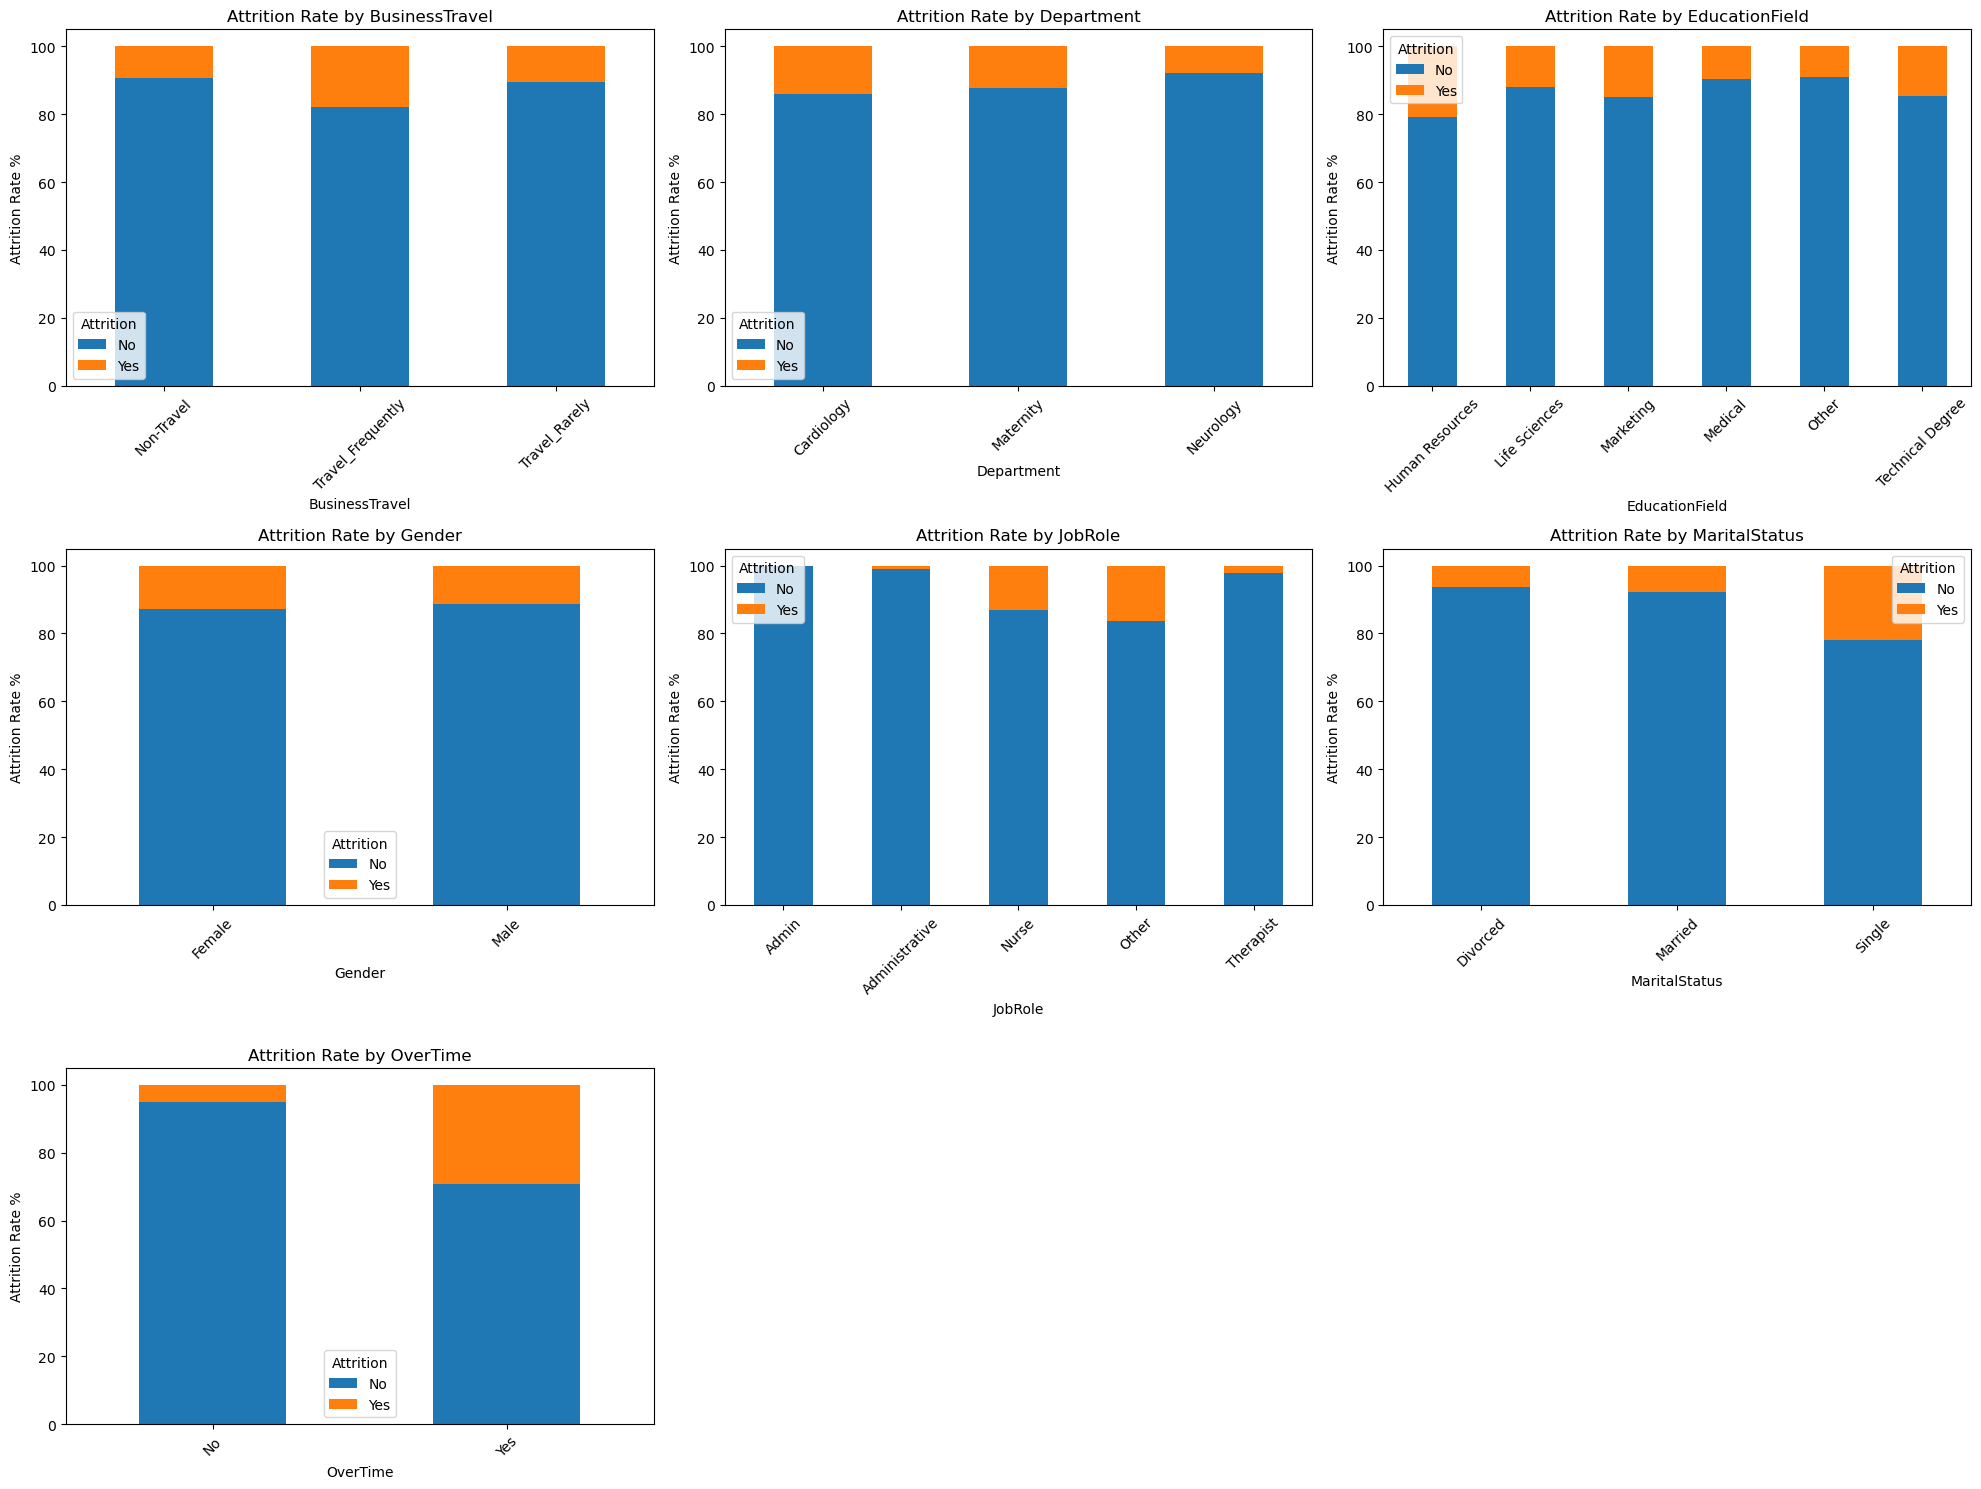

In [12]:
# List of categorical columns to explore
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Plot attrition rates for categorical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    attrition_rate = df.groupby(column)['Attrition'].value_counts(normalize=True).unstack() * 100
    attrition_rate.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Attrition Rate by {column}')
    plt.ylabel('Attrition Rate %')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')

plt.tight_layout()
plt.show()

Here's an analysis of the attrition rates across various categorical variables:

BusinessTravel:
Employees who travel frequently seem to have a higher attrition rate compared to those who travel rarely or don't travel at all.

Department:
As observed earlier, the 'Cardiology' department has the highest attrition, followed by 'Maternity' and then 'Neurology'.

EducationField:
Employees from the 'Human Resources' and 'Technical Degree' fields seem to have higher attrition rates. Those from 'Life Sciences' and 'Medical' fields have relatively lower attrition.

Gender:
The attrition rate between males and females appears to be relatively similar, with males having a slightly higher rate.

JobRole:
'Other' job roles and 'Nurses' have higher attrition rates, while 'Admin' and 'Therapist' roles have lower attrition rates.

MaritalStatus:
Single employees show a much higher attrition rate compared to married or divorced employees.

OverTime:
Employees who work overtime have a significantly higher attrition rate than those who don't.

From the above analysis, factors like frequent business travel, working in specific departments or job roles, being single, and working overtime seem to contribute to higher attrition rates.

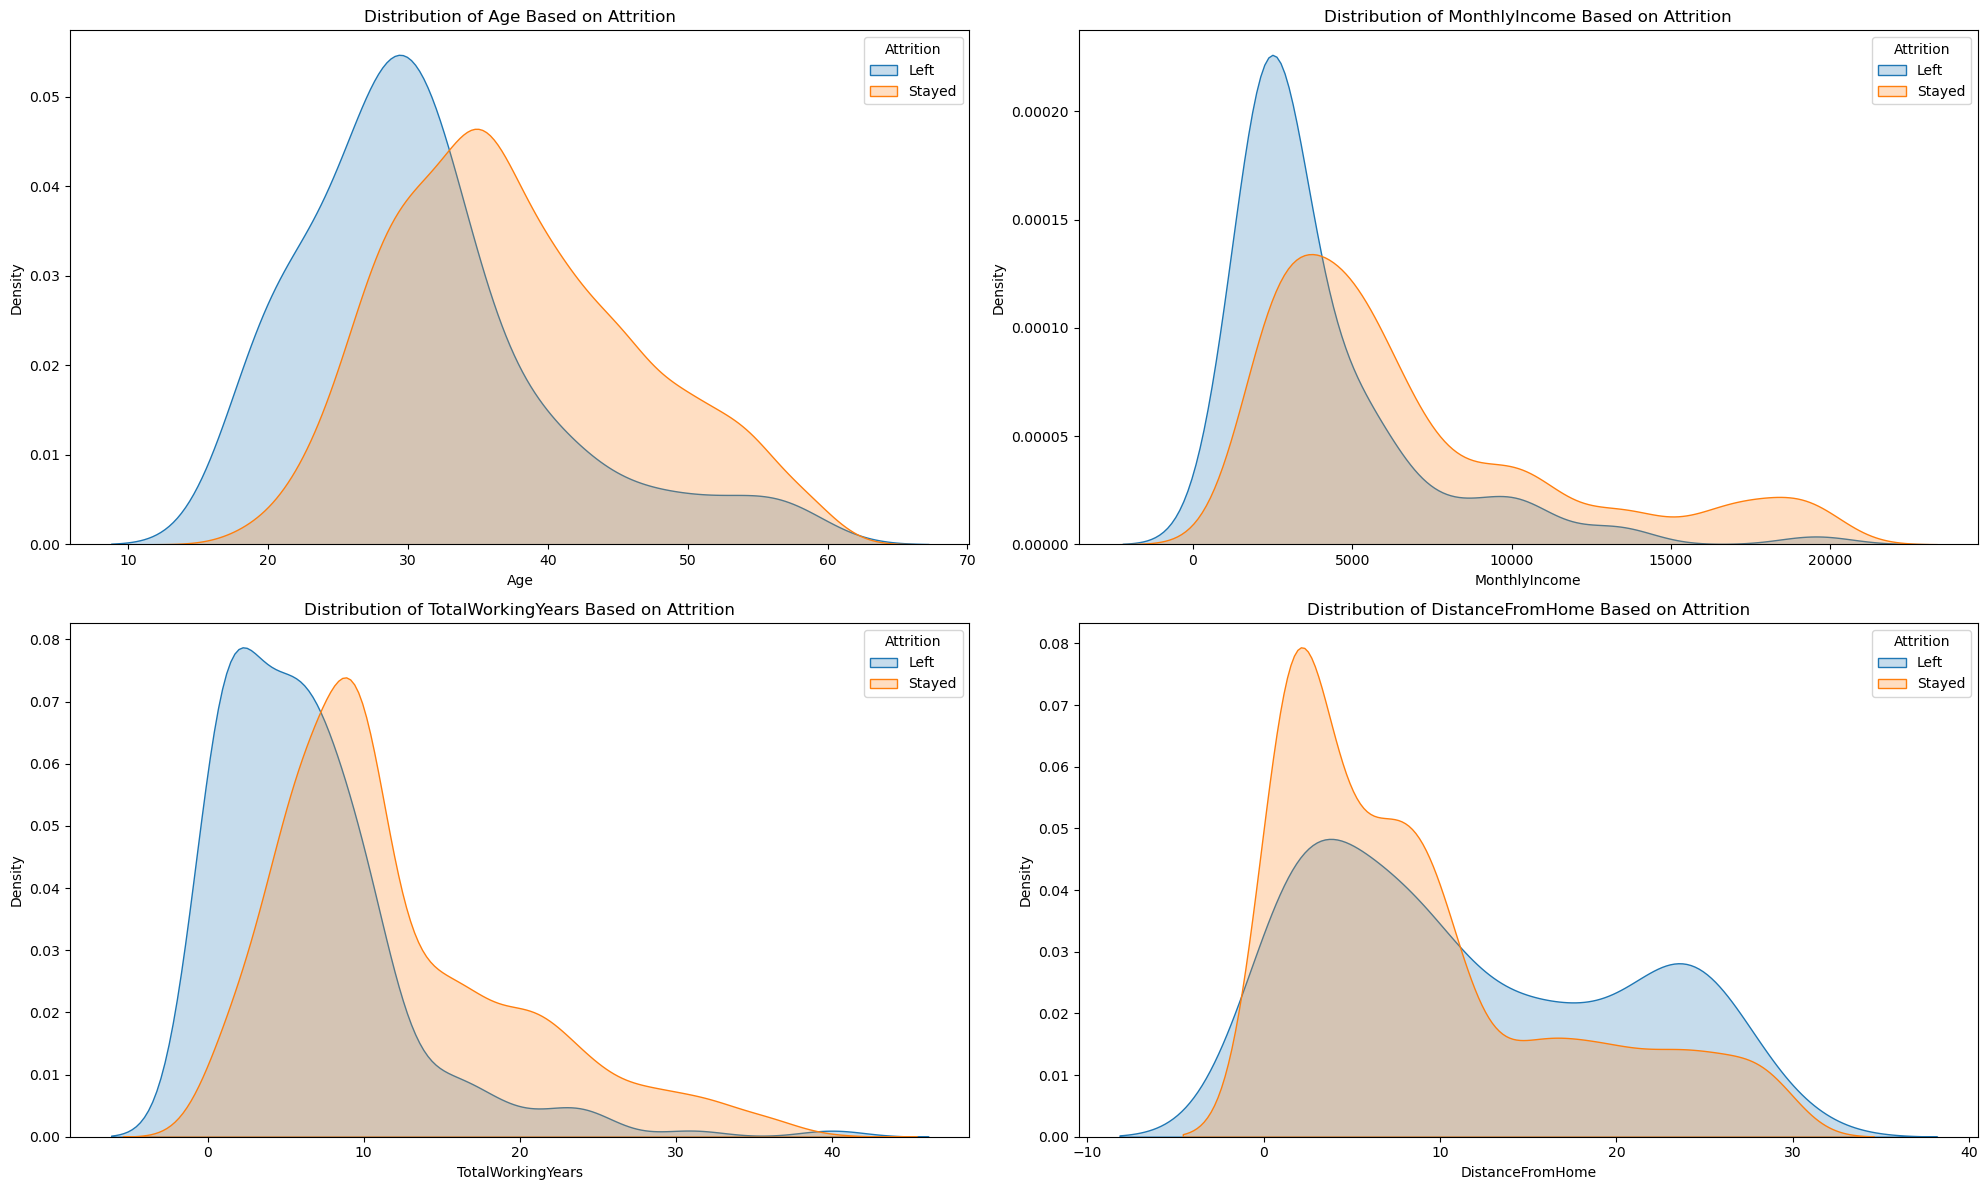

In [10]:
# List of numerical columns to explore
numerical_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome']

# Plot distribution of numerical columns based on attrition
plt.figure(figsize=(20, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[df['Attrition'] == 'Yes'][column], fill=True, label='Left')
    sns.kdeplot(df[df['Attrition'] == 'No'][column], fill=True, label='Stayed')
    plt.title(f'Distribution of {column} Based on Attrition')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(title='Attrition')

plt.tight_layout()
plt.show()


Breakdown of the distributions of key numerical features based on attrition:

Age:
Younger employees seem to have a higher tendency to leave compared to older employees. The peak for those who left is around the mid-20s to early 30s, whereas the peak for those who stayed is in the mid-30s to early 40s.

MonthlyIncome:
Employees with lower monthly incomes have a higher attrition rate. The distribution for those who left is skewed towards lower incomes compared to those who stayed.

TotalWorkingYears:
Employees with fewer total working years (especially those with less than 10 years of experience) are more likely to leave. This aligns with the age distribution since younger employees typically have fewer total working years.

DistanceFromHome:
Employees living further from work show a slightly higher tendency to leave. The density for those who left peaks around 25 units (possibly miles or kilometers) of distance from home.

Overall key findings based on the exploratory analysis:

Age, MonthlyIncome, and TotalWorkingYears appear to be significant factors affecting attrition, with younger employees, those with lower incomes, and those with fewer total working years being more likely to leave.

Among the categorical variables, BusinessTravel, Department, EducationField, JobRole, MaritalStatus, and OverTime show noticeable differences in attrition rates across their categories.

While these observations provide insights, it's important to note that causation can't be inferred from this analysis. Further statistical tests or predictive modeling would provide more concrete evidence on which factors significantly impact attrition.

****************************************************************************

I will now get into my statistical testing to better determine which factors significantly impact attrition. I will be using chi-squared test for categorcical variables (BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime') and t-test for continous variables (Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome')





In [15]:
# Redefine the list of categorical variables
categorical_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Perform chi-squared test again for each categorical variable
chi2_p_values = {}

for var in categorical_vars:
    contingency = pd.crosstab(df[var], df['Attrition'])
    _, p, _, _ = chi2_contingency(contingency)
    chi2_p_values[var] = p

chi2_p_values


{'BusinessTravel': 0.001119456597466221,
 'Department': 0.018194265980794714,
 'EducationField': 0.1632877592033215,
 'Gender': 0.4419454127111361,
 'JobRole': 7.58311282316894e-09,
 'MaritalStatus': 1.816259262576239e-16,
 'OverTime': 6.865486230870457e-43}

From the above results:

BusinessTravel, Department, JobRole, MaritalStatus, and OverTime are significantly associated with attrition since the p-values are less than the p-value threshold of 0.05 



EducationField and Gender do not appear to be significantly associated with attrition at the 0.05 threshold.

In [17]:
# List of continuous variables to test
continuous_vars = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome']

# Store p-values from the t-tests
ttest_p_values = {}

# Perform t-test for each continuous variable
for var in continuous_vars:
    group1 = df[df['Attrition'] == 'Yes'][var]
    group2 = df[df['Attrition'] == 'No'][var]
    
    _, p = ttest_ind(group1, group2)
    ttest_p_values[var] = p

ttest_p_values

{'Age': 2.2059860465155614e-23,
 'MonthlyIncome': 1.3217736355038614e-15,
 'TotalWorkingYears': 2.5918491330806845e-22,
 'DistanceFromHome': 1.482804087862088e-05}

From the above results:
    
All p-values are significantly below the 0.05 threshold, which suggests that there's a statistically significant difference in the means of these variables between employees who left and those who stayed.


In conclusion:

Employees who left the organization are, on average, younger, have a lower monthly income, have fewer total working years, and live further from home compared to those who stayed.